In [1]:
import inspect

In [2]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
df = pd.read_csv("D:\dataset_simplifie.csv")

In [28]:
patients = dict()
for i in range(df.shape[0]):
    
    if df.iloc[i, -1] in patients.keys():
        patients[df.iloc[i, -1]].append((df.iloc[i,0] + df.iloc[i,1], df.iloc[i,2:8].to_numpy(), df.iloc[i,8]))
    else:
        patients[df.iloc[i, -1]] = [(df.iloc[i,0] + df.iloc[i,1], df.iloc[i,2:8].to_numpy(), df.iloc[i,8])]
    

In [29]:
df.iloc[0]

Primary Gleason                                                            NaN
Secondary Gleason                                                          NaN
Bx Tip X (MRI Coord)                                                    -8,915
Bx Tip Y (MRI Coord)                                                    34,791
Bx Tip Z (MRI Coord)                                                   -32,093
Bx Base X (MRI Coord)                                                  -12,912
Bx Base Y (MRI Coord)                                                   49,691
Bx Base Z (MRI Coord)                                                  -46,267
Series Instance UID (MRI)    1.3.6.1.4.1.14519.5.2.1.2667179699843439819630...
Patient Number                                     Prostate-MRI-US-Biopsy-0001
Name: 0, dtype: object

In [31]:
int(float("NaN") == 0)

0

In [27]:
patients['Prostate-MRI-US-Biopsy-0001']

[(nan,
  Bx Tip X (MRI Coord)      -8,915
  Bx Tip Y (MRI Coord)      34,791
  Bx Tip Z (MRI Coord)     -32,093
  Bx Base X (MRI Coord)    -12,912
  Bx Base Y (MRI Coord)     49,691
  Bx Base Z (MRI Coord)    -46,267
  Name: 0, dtype: object,
  '1.3.6.1.4.1.14519.5.2.1.266717969984343981963002258381778490221'),
 (7.0,
  Bx Tip X (MRI Coord)      -5,644
  Bx Tip Y (MRI Coord)      23,161
  Bx Tip Z (MRI Coord)     -32,457
  Bx Base X (MRI Coord)    -11,822
  Bx Base Y (MRI Coord)     39,152
  Bx Base Z (MRI Coord)    -45,904
  Name: 1, dtype: object,
  '1.3.6.1.4.1.14519.5.2.1.266717969984343981963002258381778490221'),
 (6.0,
  Bx Tip X (MRI Coord)      -9,642
  Bx Tip Y (MRI Coord)       22,07
  Bx Tip Z (MRI Coord)     -40,452
  Bx Base X (MRI Coord)    -13,639
  Bx Base Y (MRI Coord)     39,879
  Bx Base Z (MRI Coord)    -52,446
  Name: 2, dtype: object,
  '1.3.6.1.4.1.14519.5.2.1.266717969984343981963002258381778490221'),
 (nan,
  Bx Tip X (MRI Coord)     -11,095
  Bx Tip Y (MRI Coo

In [3]:
dataset = pydicom.dcmread(r"D:\manifest-1599764098812\Prostate-MRI-US-Biopsy\Prostate-MRI-US-Biopsy-0020\01-18-2007-NA-MRI PROSTATE W WO CONTRAST-99034\4.000000-t2spcrstaxial oblProstate-63417\1-30.dcm")

In [4]:
dataset.__dir__

<bound method Dataset.__dir__ of Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.195783096583212461619190472217468369961
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']
(0008, 0012) Instance Creation Date              DA: '20070118'
(0008, 0013) Instance Creation Time              TM: '08

In [130]:
dataset.SliceLocation

"9.9037532806396"

In [167]:
position, orientation, spacing, thickness = dataset.ImagePositionPatient, dataset.ImageOrientationPatient, float(dataset.PixelSpacing[0]), float(dataset.SliceThickness)

In [165]:
dataset.SliceThickness

"1.5"

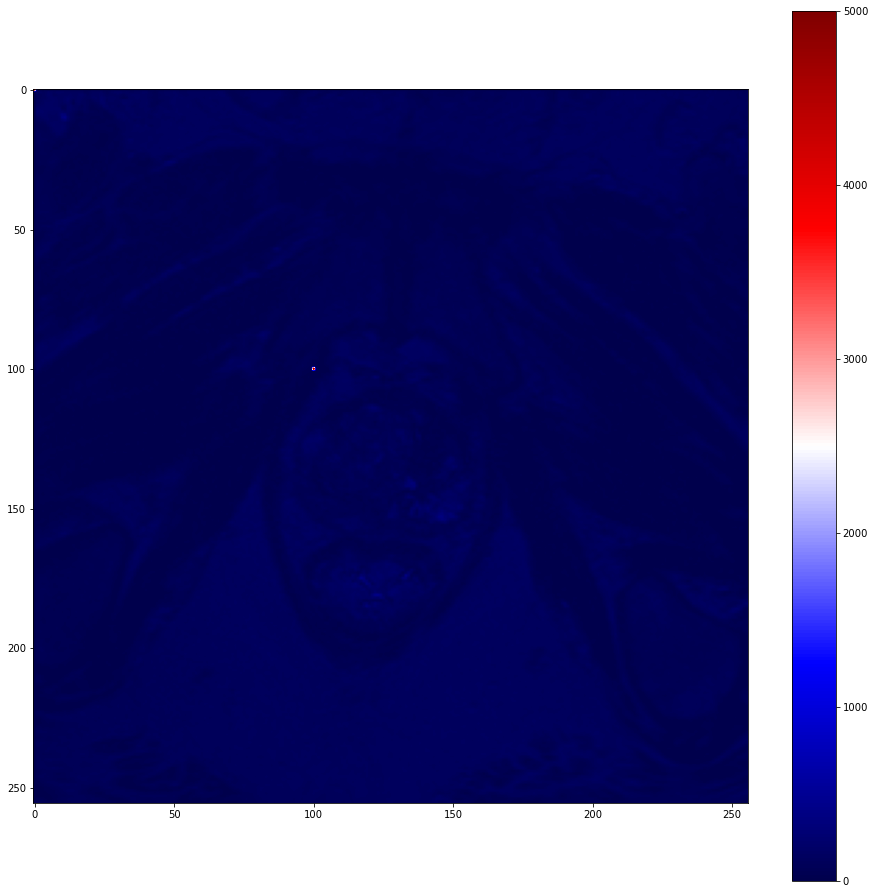

In [183]:
image = dataset.pixel_array
image[100,100] = 5000
plt.figure(figsize = (16,16))
plt.imshow(image, cmap="seismic", aspect=1)
plt.colorbar()

In [175]:
def MRItoVOX(x, c, s, t):
    """
        Fonction qui prend en entrée une position dans l'espace de l'IRM 
        et renvoie le voxel l'approximant sur l'image.
    
        Args:
            x (1d-array) : coordonnées 3D à approximer
            c (1d-array) : coordonnées 3D du voxel dans le coin supérieur gauche
            s (float) : espacement entre deux voxels d'une même coupe, en mm
            t (float) : épaisseur des coupes
        
        Returns:
            (1d-array) : index du voxel approximant x
    """
    
    return np.divide(x-c, np.array([s,s,t])).astype(int)

In [178]:
x = np.array([7.416, 26.7788, 22.8694])
x2 = np.array([3.254,38.2258,7.6074])

In [180]:
position

[-92.748184221535, -71.440677625389, 9.9037532806396]

In [181]:
c1 = MRItoVOX(x, position, spacing, thickness)

In [182]:
c2 = MRItoVOX(x2, position, spacing, thickness)

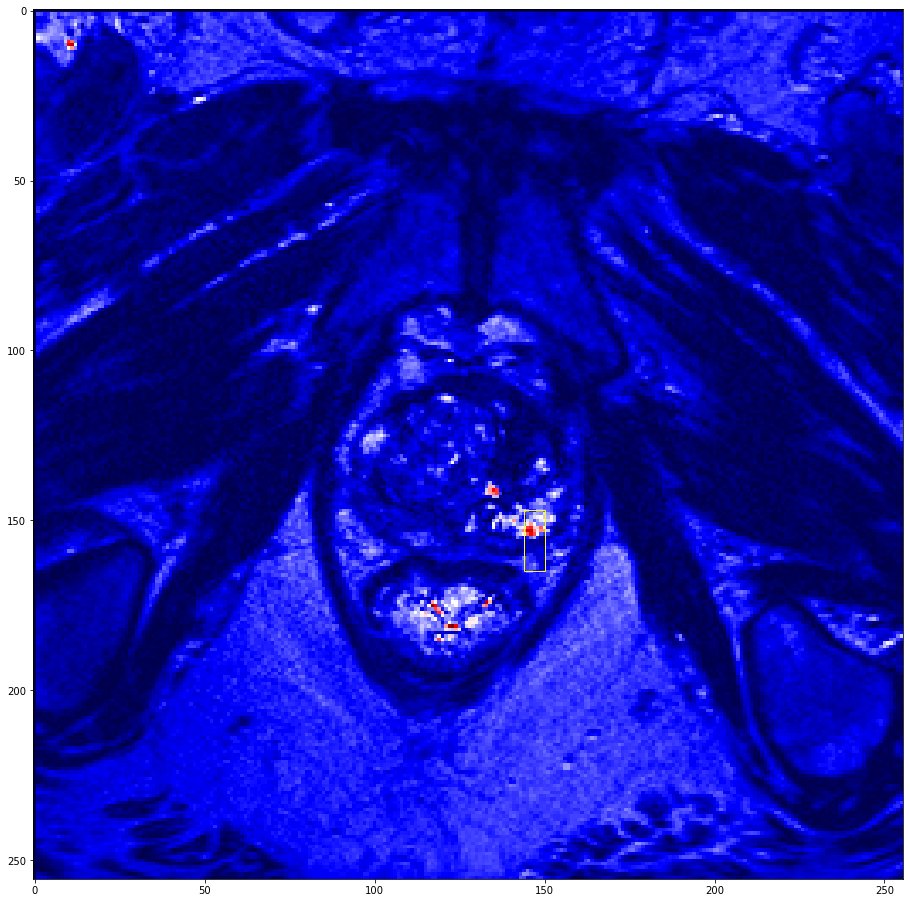

In [191]:
from matplotlib.patches import Rectangle
dataset = pydicom.dcmread(r"D:\manifest-1599764098812\Prostate-MRI-US-Biopsy\Prostate-MRI-US-Biopsy-0020\01-18-2007-NA-MRI PROSTATE W WO CONTRAST-99034\4.000000-t2spcrstaxial oblProstate-63417\1-30.dcm")
image = dataset.pixel_array
#image[100,100] = 5000
fig, ax = plt.subplots(figsize = (16,16))
ax.imshow(image, cmap="seismic", aspect=1)
ax.add_patch(Rectangle(c1[:2], c2[0] - c1[0], c2[1] - c1[1], fc="none", color="yellow"))

In [4]:
root = r"D:\manifest-1599764098812\Prostate-MRI-US-Biopsy"

dircs = os.listdir(root)[1:]

In [11]:
dic = dict()
shapes = dict()
net = []
subdir = []
slices = dict()

for dossier in dircs:
    ne = 0
    for subdir_name in os.listdir(root + "\\" + dossier):
        if "PROSTATE" in subdir_name:
            ne +=1
            exam_name = os.listdir(root + "\\" + dossier + "\\" + subdir_name)[0]
            ns = len(os.listdir(root + "\\" + dossier + "\\" + subdir_name + "\\" + exam_name))
            if ns in slices.keys():
                slices[ns] +=1
            else:
                slices[ns] = 1
            for s in os.listdir(root + "\\" + dossier + "\\" + subdir_name + "\\" + exam_name):
                #print(s)
                device = pydicom.dcmread(root + "\\" + dossier + "\\" + subdir_name + "\\" + exam_name + "\\" + s).ManufacturerModelName
                shape = pydicom.dcmread(root + "\\" + dossier + "\\" + subdir_name + "\\" + exam_name + "\\" + s).pixel_array.shape
                if device == "MAGNETOM Vida":
                    print(dossier, device)
                if device in dic.keys():
                    dic[device] +=1
                else:
                    dic[device] = 1
                if shape in shapes.keys():
                    shapes[shape] +=1
                else:
                    shapes[shape] = 1
                break
    #print(dossier, ne)
    net.append(ne)

print(dic)

Prostate-MRI-US-Biopsy-0055 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0066 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0078 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0128 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0161 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0183 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0198 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0201 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0203 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0237 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0248 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0318 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0326 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0332 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0340 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0377 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0412 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0421 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0423 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0424 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0429 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0434 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0460 MAGNETOM Vida
Prostate-MRI-US-Biopsy-0487 MAGNET

In [211]:
np.count_nonzero(np.array(net) != 0)

776

In [97]:
print(dic)

{'Skyra': 641, 'TrioTim': 18, 'Verio': 32, 'Skyra_fit': 82, 'Prisma_fit': 61, 'Avanto_fit': 29, 'MAGNETOM Vida': 63, 'Avanto': 11}


In [214]:
np.sum(dic.values())

dict_values([641, 18, 32, 82, 61, 29, 63, 11])

In [216]:
np.sum([i for i in dic.values()])

937

In [219]:
shapes

{(256, 256): 896, (512, 512): 37, (320, 320): 2, (256, 360): 1, (512, 736): 1}

In [221]:
slices

{60: 894,
 72: 8,
 80: 4,
 64: 17,
 59: 6,
 88: 1,
 20: 3,
 52: 1,
 40: 1,
 44: 1,
 48: 1}